# Dynamic Time Wrapping

## Import Library dan Set Path

Kode Python ini digunakan untuk mempersiapkan analisis audio dengan membandingkan rekaman lama dan rekaman baru menggunakan fitur MFCC (Mel-Frequency Cepstral Coefficients). Library librosa digunakan untuk pemrosesan audio, numpy dan pandas untuk manipulasi data, serta os dan glob untuk navigasi file. Parameter sampling rate (SR) diatur 22.050 Hz dan jumlah koefisien MFCC (N_MFCC) diatur 13. Direktori dasar data lama disimpan di BASE_DIR, dengan folder buka dan tutup untuk masing-masing pengguna disimpan di dictionary OLD_DIRS. File rekaman baru disimpan di dictionary NEW_FILES. Hasil perhitungan nanti akan disimpan ke file CSV bernama dtw_results.csv. Kode ini menyiapkan struktur file dan parameter yang dibutuhkan untuk analisis kesamaan audio, misalnya menggunakan metode Dynamic Time Warping (DTW).

In [42]:
import os
import librosa
import numpy as np
import pandas as pd
from glob import glob
from tqdm import tqdm

SR = 22050
N_MFCC = 13

# === SESUAIKAN DENGAN STRUKTUR ZIP ===
BASE_DIR = r'/mnt/data/databukatutup'  # ROOT dari ZIP kamu

OLD_DIRS = {
    'buka_user1' : os.path.join(BASE_DIR, 'user 1/buka'),
    'tutup_user1': os.path.join(BASE_DIR, 'user 1/tutup'),
}

# === FILE BARU (rekaman baru) ===
# Pastikan file ini ada dalam folder databukatutup/
NEW_FILES = {
    "buka_baru":  "rekaman_buka_tutup/bukabaru.wav",
    "tutup_baru": "rekaman_buka_tutup/tutupbaru.wav"
}

OUT_CSV = 'dtw_results.csv'


## Fungsi extrac dan DTW

Kode Python ini digunakan untuk menyiapkan perhitungan kesamaan antara file audio lama dan file audio baru menggunakan MFCC dan metode Dynamic Time Warping (DTW). Parameter sampling rate (SR) ditetapkan 22.050 Hz dan jumlah koefisien MFCC (N_MFCC) ditetapkan 13. Direktori audio lama disimpan dalam dictionary OLD_DIRS dengan kategori buka dan tutup, sementara file audio baru disimpan di dictionary NEW_FILES. Fungsi extract_mfcc membaca file audio dari path yang diberikan, mengubahnya menjadi mono, lalu mengekstraksi fitur MFCC dari audio tersebut. Fungsi dtw_distance menghitung jarak DTW antara dua matriks MFCC, mengembalikan tiga nilai: jarak mentah (raw), jarak dinormalisasi per panjang path (norm), dan panjang path optimal (path_len). Kode ini mempersiapkan dasar untuk membandingkan kesamaan audio lama dan baru secara numerik.

In [43]:
import librosa
import numpy as np

SR = 22050
N_MFCC = 13

# Path folder audio sesuai ZIP databukatutup
OLD_DIRS = {
    'buka' : r'/mnt/data/databukatutup/user 1/buka',
    'tutup': r'/mnt/data/databukatutup/user 1/tutup',
}

# Path file audio baru (pastikan filenya ada!)
NEW_FILES = {
    'buka_baru'  : r'/mnt/data/databukatutup/bukabaru.wav',
    'tutup_baru' : r'/mnt/data/databukatutup/tutupbaru.wav'
}

def extract_mfcc(path, sr=SR, n_mfcc=N_MFCC):
    y, _ = librosa.load(path, sr=sr, mono=True)
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)
    return mfcc

def dtw_distance(m1, m2, metric='euclidean'):
    D, wp = librosa.sequence.dtw(X=m1, Y=m2, metric=metric)
    raw = D[-1, -1]
    path_len = len(wp)
    norm = raw / path_len if path_len > 0 else np.inf
    return float(raw), float(norm), int(path_len)


## Collect data lama dan ekstrak mfcc

Kode Python ini digunakan untuk menampilkan seluruh struktur direktori dan file yang ada di dalam folder tertentu. Fungsi walk_all menerima parameter root sebagai folder awal untuk dijelajahi (default /mnt/data). Fungsi ini menggunakan os.walk, yang secara rekursif menelusuri setiap subfolder di dalam folder root. Untuk setiap folder yang ditemui, kode mencetak path folder tersebut (PATH), daftar subfolder di dalamnya (DIRS), dan daftar file yang ada (FILES). Garis pemisah "-" * 60 digunakan untuk membedakan output setiap folder agar lebih mudah dibaca. Pemanggilan walk_all("/mnt/data") menampilkan seluruh struktur folder dan file mulai dari /mnt/data.

In [44]:
import os

def walk_all(root="/mnt/data"):
    for path, dirs, files in os.walk(root):
        print("PATH :", path)
        print(" DIRS:", dirs)
        print(" FILES:", files)
        print("-" * 60)

walk_all("/mnt/data")

Kode Python ini digunakan untuk menampilkan daftar isi folder tertentu. Fungsi os.listdir(path) mengembalikan daftar nama file dan folder yang ada di path yang diberikan.

- os.listdir("/mnt") menampilkan semua file dan folder yang ada di dalam direktori /mnt.

- os.listdir("/") menampilkan semua file dan folder yang ada di direktori root sistem (/).

Outputnya berupa list Python yang berisi nama-nama file dan folder di masing-masing direktori.

In [45]:
import os

print(os.listdir("/mnt"))
print(os.listdir("/"))

[]
['opt', 'libx32', 'tmp', 'proc', 'dev', 'bin', 'mnt', 'root', 'srv', 'home', 'var', 'etc', 'sbin', 'usr', 'boot', 'sys', 'lib32', 'lib64', 'media', 'lib', 'run', 'kaggle', 'content', '.dockerenv', 'datalab', 'tools', 'python-apt', 'python-apt.tar.xz', 'NGC-DL-CONTAINER-LICENSE', 'cuda-keyring_1.1-1_all.deb']


Kode Python ini digunakan di Google Colab untuk mengunggah file dari komputer lokal ke lingkungan Colab.

- from google.colab import files mengimpor modul files dari library Colab.

- uploaded = files.upload() membuka jendela dialog agar pengguna bisa memilih file dari komputer mereka. File yang diunggah akan disimpan ke variabel uploaded dalam bentuk dictionary, di mana kunci adalah nama file dan nilai adalah konten file dalam bentuk byte.

In [17]:
from google.colab import files
uploaded = files.upload()

Saving databukatutup.zip to databukatutup.zip


Kode Python ini digunakan untuk menampilkan daftar file dan folder yang ada di direktori kerja saat ini.

- os.listdir() tanpa argumen akan mengembalikan list yang berisi nama semua file dan folder di working directory (folder tempat notebook atau script sedang dijalankan).

- print(os.listdir()) menampilkan daftar tersebut di output.

Ini berguna untuk memeriksa isi folder sebelum membaca atau memproses file.

In [18]:
import os
print(os.listdir())

['.config', 'databukatutup.zip', 'sample_data']


Kode Python ini digunakan untuk mengekstrak isi file ZIP ke dalam folder tertentu.

- zipfile.ZipFile(zip_path, 'r') membuka file ZIP dengan mode baca ('r').

- z.extractall(extract_path) mengekstrak semua file dan folder dari ZIP ke folder tujuan extract_path.

- print(os.listdir(extract_path)) menampilkan daftar file dan folder yang telah diekstrak ke dalam folder tersebut.

Dengan begitu, seluruh isi ZIP databukatutup.zip akan tersedia di folder rekaman_buka_tutup untuk diproses lebih lanjut.

In [19]:
import zipfile
import os

zip_path = "databukatutup.zip"   # nama file ZIP kamu
extract_path = "rekaman_buka_tutup"  # folder tujuan ekstraksi

with zipfile.ZipFile(zip_path, 'r') as z:
    z.extractall(extract_path)

print("Isi folder rekaman_buka_tutup:")
print(os.listdir(extract_path))


Isi folder rekaman_buka_tutup:
['databukatutup']


Kode Python ini digunakan untuk menampilkan seluruh struktur folder dan file yang ada di dalam folder rekaman_buka_tutup.

- os.walk("rekaman_buka_tutup") menelusuri folder rekaman_buka_tutup secara rekursif, termasuk semua subfolder di dalamnya.

- Untuk setiap folder yang ditemui, kode mencetak:

- PATH → path folder saat ini

- DIRS → daftar subfolder di dalam folder tersebut

- FILES → daftar file yang ada di folder tersebut

- Garis pemisah "-" * 50 digunakan agar output lebih rapi dan mudah dibaca.

Kode ini membantu memeriksa struktur folder dan memastikan semua file audio sudah diekstrak dan tersedia.

In [21]:
import os

for path, dirs, files in os.walk("rekaman_buka_tutup"):
    print("PATH :", path)
    print("DIRS :", dirs)
    print("FILES:", files)
    print("-" * 50)


PATH : rekaman_buka_tutup
DIRS : ['databukatutup']
FILES: []
--------------------------------------------------
PATH : rekaman_buka_tutup/databukatutup
DIRS : ['user 2', 'user 1']
FILES: []
--------------------------------------------------
PATH : rekaman_buka_tutup/databukatutup/user 2
DIRS : ['buka', 'tutup']
FILES: []
--------------------------------------------------
PATH : rekaman_buka_tutup/databukatutup/user 2/buka
DIRS : []
FILES: ['buka2 (41).wav', 'buka2 (61).wav', 'buka2 (20).wav', 'buka2 (69).wav', 'buka2 (40).wav', 'buka2 (100).wav', 'buka2 (21).wav', 'buka2 (19).wav', 'buka2 (37).wav', 'buka2 (57).wav', 'buka2 (23).wav', 'buka2 (90).wav', 'buka2 (27).wav', 'buka2 (31).wav', 'buka2 (47).wav', 'buka2 (44).wav', 'buka2 (99).wav', 'buka2 (5).wav', 'buka2 (81).wav', 'buka2 (79).wav', 'buka2 (89).wav', 'buka2 (52).wav', 'buka2 (64).wav', 'buka2 (62).wav', 'buka2 (82).wav', 'buka2 (65).wav', 'buka2 (71).wav', 'buka2 (76).wav', 'buka2 (4).wav', 'buka2 (77).wav', 'buka2 (67).wav',

Kode Python ini digunakan untuk menyiapkan dan mengekstrak fitur MFCC dari rekaman audio lama (dan opsional untuk rekaman baru) untuk analisis audio, misalnya perbandingan suara buka-tutup.

1. Menetapkan path data

- BASE menunjuk ke folder utama tempat data lama berada.

- OLD_DIRS menyimpan folder buka dan tutup masing-masing sebagai kategori data lama.

- NEW_FILES disiapkan untuk file audio baru (masih dikomentari).

2. Fungsi ekstraksi MFCC

- extract_mfcc membaca file audio, mengubahnya menjadi mono, dan mengekstrak fitur MFCC dengan sampling rate 16.000 Hz dan 20 koefisien MFCC.

3. Mengumpulkan file audio lama

- Script menelusuri masing-masing folder di OLD_DIRS dan mencari semua file .wav.

- Jumlah file yang ditemukan untuk setiap kategori ditampilkan.

4. Ekstraksi MFCC untuk data lama

- Setiap file audio lama diubah menjadi MFCC dan disimpan dalam dictionary old_mfcc dengan struktur old_mfcc[label][file_path].

5. Ekstraksi MFCC untuk file baru (opsional)

- Jika ada file baru di NEW_FILES, fitur MFCC juga diekstrak dan disimpan di dictionary new_mfcc.

Di akhir, kode menampilkan pesan bahwa ekstraksi MFCC telah selesai. Kode ini menyiapkan data numerik yang siap untuk analisis perbandingan audio, misalnya menggunakan metode Dynamic Time Warping.

In [25]:
import os
import librosa
import numpy as np
from glob import glob
from tqdm import tqdm

# ============================
# 1. SET PATH DATA
# ============================

BASE = "rekaman_buka_tutup/databukatutup/user 1"  # GANTI SESUAI NAMA FOLDER ZIP BUKA-TUTUP

OLD_DIRS = {
    "buka":  os.path.join(BASE, "buka"),
    "tutup": os.path.join(BASE, "tutup"),
}

NEW_FILES = {
    # "buka_baru": "buka_baru.wav",
    # "tutup_baru": "tutup_baru.wav"
}

# ============================
# 2. FUNGSI EXTRACT MFCC
# ============================

SR = 16000
N_MFCC = 20

def extract_mfcc(path, sr=SR, n_mfcc=N_MFCC):
    y, _ = librosa.load(path, sr=sr, mono=True)
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)
    return mfcc

# ============================
# 3. COLLECT FILE DATA LAMA
# ============================

print("Mengumpulkan daftar file data lama...\n")

old_files = {}
for label, folder in OLD_DIRS.items():

    if not os.path.exists(folder):
        raise FileNotFoundError(f"Folder tidak ditemukan: {folder}")

    pattern = os.path.join(folder, "*.wav")
    files = sorted(glob(pattern))

    print(f"{label} → {len(files)} file ditemukan")
    old_files[label] = files

# ============================
# 4. EKSTRAK MFCC DATA LAMA
# ============================

print("\nEkstrak MFCC untuk data lama...\n")

old_mfcc = {}
for label, files in old_files.items():
    old_mfcc[label] = {}
    for f in tqdm(files, desc=f"MFCC {label}"):
        old_mfcc[label][f] = extract_mfcc(f)

# ============================
# 5. EKSTRAK MFCC UNTUK FILE BARU (Opsional)
# ============================

new_mfcc = {}
if len(NEW_FILES) > 0:
    print("\nEkstrak MFCC untuk file baru...\n")
    for name, path in NEW_FILES.items():
        if not os.path.exists(path):
            raise FileNotFoundError(f"File baru tidak ditemukan: {path}")
        new_mfcc[name] = extract_mfcc(path)

print("\nSELESAI! MFCC berhasil diekstrak.")


Mengumpulkan daftar file data lama...

buka → 100 file ditemukan
tutup → 99 file ditemukan

Ekstrak MFCC untuk data lama...



MFCC tutup: 100%|██████████| 99/99 [00:00<00:00, 114.27it/s]


SELESAI! MFCC berhasil diekstrak.


## Perhitungan DTW

Kode Python ini digunakan untuk menghitung kesamaan antara file audio baru dan file audio lama menggunakan metode Dynamic Time Warping (DTW), lalu menyimpan hasilnya ke file CSV.

1. rows = [] menyiapkan list untuk menyimpan hasil perhitungan.

2. Loop pertama menelusuri setiap file baru di new_mfcc.

3. Loop kedua menelusuri semua label kategori lama (buka dan tutup).

4. Loop ketiga menelusuri setiap file lama dalam kategori tersebut.

5. Untuk setiap pasangan file baru dan file lama:

- MFCC lama diambil dari old_mfcc.

- dtw_distance(m_old, new_feat) menghitung jarak DTW, jarak dinormalisasi, dan panjang path optimal.

- Hasil perhitungan disimpan sebagai dictionary ke dalam rows.

6. Setelah semua perhitungan selesai, rows diubah menjadi DataFrame Pandas dan disimpan sebagai CSV di OUT_CSV.

7. Output menunjukkan lokasi file CSV yang berisi hasil perbandingan semua file audio.

Hasil CSV ini dapat digunakan untuk menganalisis file baru paling mirip dengan kategori atau file lama tertentu.

In [48]:
rows = []
print("Menghitung DTW...")

# Loop MFCC file baru
for new_name, new_feat in new_mfcc.items():

    # Loop semua label lama
    for label, file_list in old_files.items():

        # Loop setiap file lama dalam label tersebut
        for old_path in tqdm(file_list, desc=f"DTW {new_name} vs {label}", leave=False):

            # Ambil MFCC lama
            m_old = old_mfcc[label][os.path.basename(old_path)]

            # Hitung DTW
            raw_cost, norm_cost, path_len = dtw_distance(m_old, new_feat)

            # Simpan hasil
            rows.append({
                'new_file': new_name,
                'old_label': label,
                'old_path': old_path,
                'raw_cost': raw_cost,
                'normalized_cost': norm_cost,
                'path_len': path_len
            })

# Buat DataFrame dan simpan
df = pd.DataFrame(rows)
df.to_csv(OUT_CSV, index=False)
print(f"Hasil tersimpan ke {OUT_CSV}")


Menghitung DTW...
Hasil tersimpan ke dtw_results.csv


## Kemiripan data lama dan baru


Kode Python ini digunakan untuk menampilkan 5 file lama paling mirip dengan setiap file baru berdasarkan nilai DTW yang telah dihitung.

1. if not df.empty: memastikan bahwa DataFrame df berisi data hasil perhitungan DTW.

2. df['new_file'].unique() mendapatkan daftar semua file baru yang dibandingkan.

3. Untuk setiap file baru:

- Data dipilih (sub = df[df['new_file'] == new_name]) dan diurutkan berdasarkan normalized_cost dari terkecil ke terbesar.

- Lima file lama teratas (head(5)) yang memiliki kesamaan paling tinggi ditampilkan.

4. sub.to_string(columns=[...], index=False) mencetak tabel berisi:

- old_label → kategori file lama (buka/tutup)

- old_path → path file lama

- normalized_cost → nilai DTW dinormalisasi sebagai ukuran kesamaan

Output ini memudahkan untuk mengetahui file lama mana yang paling mirip dengan setiap file baru.

In [59]:
# ============================
# 9. TAMPILKAN TOP 5 PALING MIRIP
# ============================

if not df.empty:
    print("\nTop 5 file lama paling mirip untuk setiap file baru:")
    for new_name in df['new_file'].unique():
        sub = df[df['new_file'] == new_name].sort_values('normalized_cost').head(5)
        print(f"\n== {new_name} ==")
        print(sub.to_string(columns=['old_label','old_path','normalized_cost'], index=False))



Top 5 file lama paling mirip untuk setiap file baru:

== buka2 (41) ==
old_label                                                               old_path  normalized_cost
     buka rekaman_buka_tutup/databukatutup/user 1/buka/20251106_211852031(1).wav        69.576539
     buka    rekaman_buka_tutup/databukatutup/user 1/buka/20251106_211852031.wav        69.576539
    tutup          rekaman_buka_tutup/databukatutup/user 1/tutup/20251107_75.wav        78.760829
    tutup          rekaman_buka_tutup/databukatutup/user 1/tutup/20251107_76.wav        78.760829
     buka    rekaman_buka_tutup/databukatutup/user 1/buka/20251106_211544124.wav        87.630447

== buka2 (61) ==
old_label                                                               old_path  normalized_cost
    tutup          rekaman_buka_tutup/databukatutup/user 1/tutup/20251107_75.wav       107.613956
    tutup          rekaman_buka_tutup/databukatutup/user 1/tutup/20251107_76.wav       107.613956
     buka rekaman_buka_tutup

## Visualisasi


Kode Python ini digunakan untuk memvisualisasikan hasil perhitungan DTW dari file audio lama dan baru dalam beberapa bentuk grafik. Berikut rinciannya:

1. Barplot rata-rata normalized DTW cost per label lama

- summary = df.groupby(['old_label'])['normalized_cost'].mean() menghitung rata-rata normalized_cost untuk setiap kategori (buka/tutup).

- Barplot menampilkan seberapa besar rata-rata jarak DTW setiap label lama. Nilai lebih rendah berarti kesamaan lebih tinggi.

2. Histogram distribusi cost setiap label lama

- Membuat histogram normalized_cost untuk setiap label lama.

- Menunjukkan sebaran nilai DTW, sehingga dapat melihat apakah beberapa file lama lebih mirip dibanding yang lain.

3. Scatter plot cost semua file

- Menampilkan semua file lama sebagai titik, diurutkan berdasarkan normalized_cost.

- Visualisasi ini membantu melihat variasi jarak DTW di seluruh dataset.

4. Visualisasi DTW alignment untuk file lama terbaik

- Menemukan file lama dengan normalized_cost terkecil (best_match).

- Menghitung DTW dari file itu terhadap dirinya sendiri (self-alignment) karena file baru tidak ada di contoh ini.

- Menampilkan DTW cost matrix dan warp path dengan garis kuning, memperlihatkan bagaimana waktu pada dua sinyal audio dipetakan.

Secara keseluruhan, kode ini membantu memahami kualitas kesamaan audio, distribusi jarak DTW, dan pola alignment antar file.


Menyiapkan visualisasi...


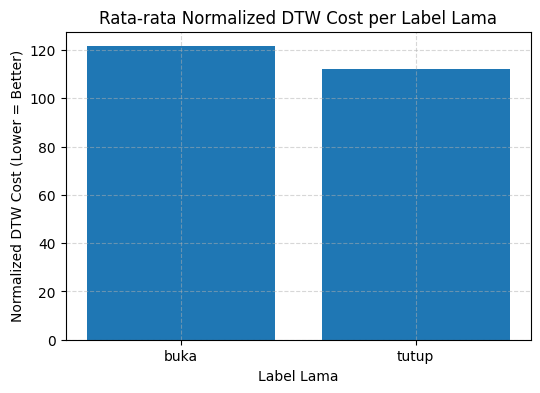

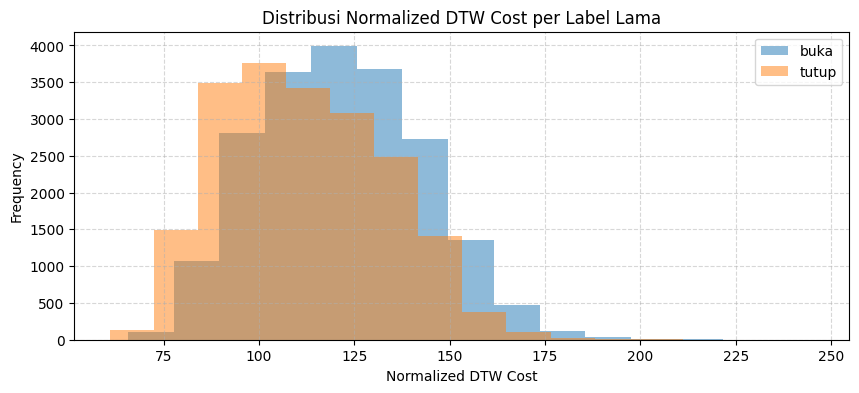

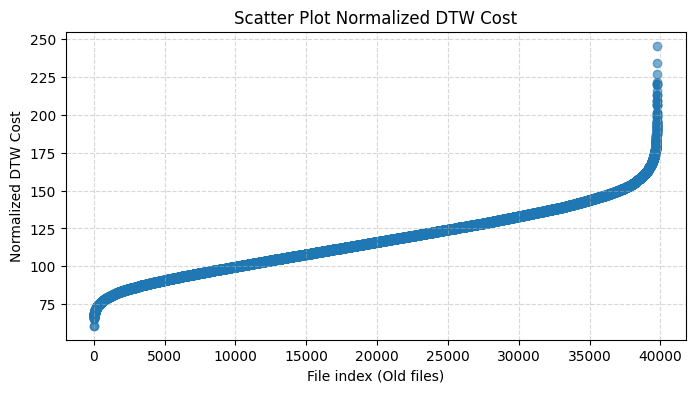


Visualisasi Warp Path (DTW Alignment) untuk file terbaik:
File lama terbaik: rekaman_buka_tutup/databukatutup/user 1/tutup/20251107_75.wav


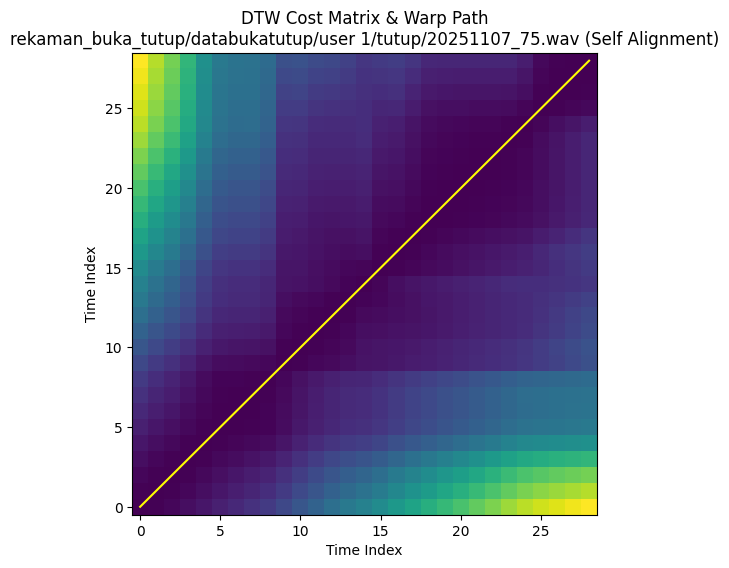

In [60]:
import matplotlib.pyplot as plt

print("\nMenyiapkan visualisasi...")

# Pastikan df punya kolom: old_file, old_label, normalized_cost
summary = df.groupby(['old_label'])['normalized_cost'].mean().reset_index()

# =============================
# 1. BARPLOT rata-rata cost per label lama
# =============================
plt.figure(figsize=(6,4))
plt.bar(summary['old_label'], summary['normalized_cost'])
plt.title("Rata-rata Normalized DTW Cost per Label Lama")
plt.ylabel("Normalized DTW Cost (Lower = Better)")
plt.xlabel("Label Lama")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


# =============================
# 2. HISTOGRAM distribusi cost setiap label lama
# =============================
plt.figure(figsize=(10,4))

for label in df['old_label'].unique():
    subset = df[df['old_label'] == label]['normalized_cost']
    plt.hist(subset, bins=15, alpha=0.5, label=f"{label}")

plt.title("Distribusi Normalized DTW Cost per Label Lama")
plt.xlabel("Normalized DTW Cost")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


# =============================
# 3. SCATTER PLOT cost semua file
# =============================
df_sorted = df.sort_values('normalized_cost')

plt.figure(figsize=(8,4))
plt.scatter(range(len(df_sorted)), df_sorted['normalized_cost'], alpha=0.6)
plt.title("Scatter Plot Normalized DTW Cost")
plt.xlabel("File index (Old files)")
plt.ylabel("Normalized DTW Cost")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


# =============================
# 4. DTW Alignment untuk file lama terbaik
# =============================
print("\nVisualisasi Warp Path (DTW Alignment) untuk file terbaik:")

best_match = df.sort_values('normalized_cost').iloc[0]
best_old_file = best_match['old_path']
best_old_label = best_match['old_label']

print(f"File lama terbaik: {best_old_file}")

m_old = old_mfcc[best_old_label][best_old_file]

# Karena TIDAK ada file baru, kita DTW-kan dirinya sendiri
D, wp = librosa.sequence.dtw(X=m_old, Y=m_old)

plt.figure(figsize=(6,6))
plt.imshow(D.T, origin='lower', aspect='auto', interpolation='nearest')
plt.plot([p[0] for p in wp], [p[1] for p in wp], color='yellow')
plt.title(f"DTW Cost Matrix & Warp Path\n{best_old_file} (Self Alignment)")
plt.xlabel("Time Index")
plt.ylabel("Time Index")
plt.show()
